In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
df = pd.read_csv('../loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Gender"].fillna(df['Gender'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)
df["Married"].fillna(df['Married'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
df.shape

(614, 13)

<AxesSubplot:xlabel='ApplicantIncome'>

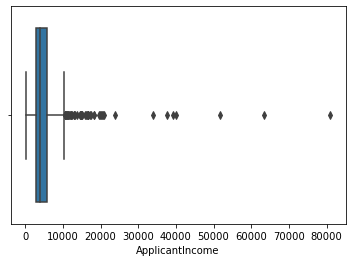

In [10]:
sns.boxplot(x=df.ApplicantIncome)

In [11]:
Q1 = df.ApplicantIncome.quantile(0.25)
Q2 = df.ApplicantIncome.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit =',upper_limit)
print('lower_limit =',lower_limit)

2917.5
upper_limit = 10171.25
lower_limit = -1498.75


In [12]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome']>upper_limit,df['ApplicantIncome'].median(),df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome'>

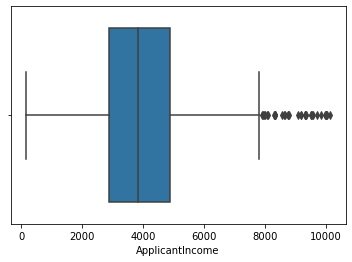

In [13]:
sns.boxplot(x=df.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome'>

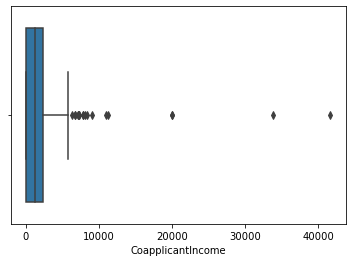

In [14]:
sns.boxplot(x=df.CoapplicantIncome)

In [15]:
Q1 = df.CoapplicantIncome.quantile(0.25)
Q2 = df.CoapplicantIncome.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome']>upper_limit,df['CoapplicantIncome'].median(),df['CoapplicantIncome'])

2297.25
upper_limit= 5743.125


<AxesSubplot:xlabel='CoapplicantIncome'>

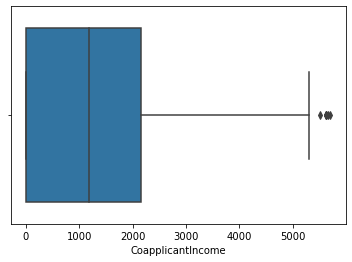

In [16]:
sns.boxplot(x=df.CoapplicantIncome)

<AxesSubplot:xlabel='LoanAmount'>

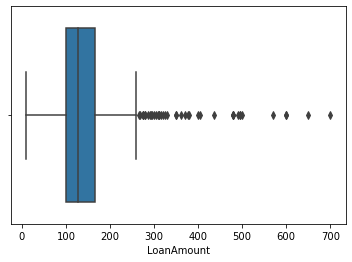

In [17]:
sns.boxplot(x=df.LoanAmount)

In [18]:
Q1 = df.LoanAmount.quantile(0.25)
Q2 = df.LoanAmount.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit =',upper_limit)
df['LoanAmount'] = np.where(df['LoanAmount']>upper_limit,df['LoanAmount'].median(),df['LoanAmount'])

64.5
upper_limit = 261.5


<AxesSubplot:xlabel='LoanAmount'>

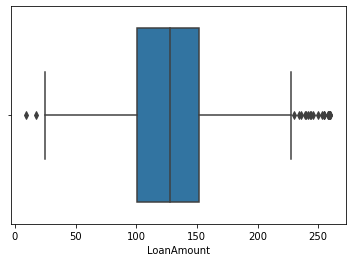

In [19]:
sns.boxplot(x=df.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term'>

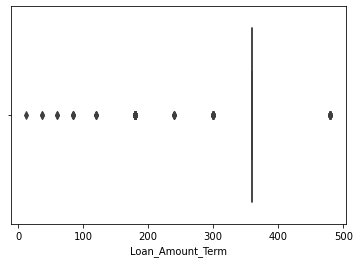

In [20]:
sns.boxplot(x=df.Loan_Amount_Term)

In [21]:
Q1 = df.Loan_Amount_Term.quantile(0.25)
Q2 = df.Loan_Amount_Term.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term']>upper_limit,df['Loan_Amount_Term'].median(),df['Loan_Amount_Term'])

0.0
upper_limit= 360.0


<AxesSubplot:xlabel='Loan_Amount_Term'>

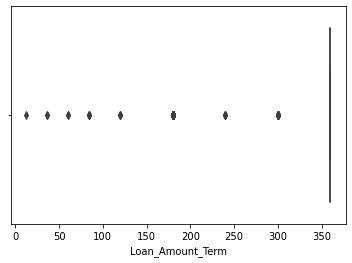

In [22]:
sns.boxplot(x=df.Loan_Amount_Term)

## Handling Categorical Values - Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)
df.Loan_Status = le.fit_transform(df.Loan_Status)

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [25]:
df=df.drop(columns=['Loan_ID'],axis=1)

In [26]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
df=df.replace('3+',3,)
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [28]:
y=df.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [29]:
X=df.drop(columns=['Loan_Status'],axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2


## Scaling The Data

In [30]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(X), columns=X.columns)
X_Scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.947218,-0.893781,-0.010078,0.338246,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.261857,0.154146,-0.010078,0.338246,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.595116,-0.893781,-1.395146,0.338246,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.820863,0.744821,-0.188797,0.338246,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.028964,-0.893781,0.280339,0.338246,0.411733,1.223298


## Splitting Data Into Train And Test

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_Scaled,y, test_size=0.33,random_state=42)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(411, 11) (203, 11) (411,) (203,)


In [34]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
244,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.375324,2.175645,-0.121777,0.338246,0.411733,-0.047607
393,0.472343,0.728816,1.244745,1.892641,-0.392601,-1.140265,0.235451,-0.345175,-2.628655,0.411733,-0.047607
310,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.640049,-0.893781,-0.993030,0.338246,0.411733,-0.047607
408,0.472343,0.728816,0.253470,-0.528362,-0.392601,2.274091,-0.893781,0.526077,-0.650721,-2.428760,-0.047607
572,0.472343,0.728816,1.244745,-0.528362,-0.392601,-0.155261,-0.893781,-0.010078,0.338246,0.411733,1.223298


In [35]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,0.472343,0.728816,-0.737806,-0.528362,-0.392601,2.697976,-0.893781,2.223902,0.338246,0.411733,-0.047607
377,0.472343,0.728816,-0.737806,-0.528362,-0.392601,0.114066,-0.893781,0.034601,0.338246,0.411733,-0.047607
163,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.036651,0.111756,0.660116,0.338246,0.411733,-1.318513
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.649252,-0.893781,-1.283447,0.338246,0.411733,-1.318513
132,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-0.747779,-0.893781,-1.305787,0.338246,0.411733,-0.047607


In [36]:
y_train.head()

244    1
393    1
310    1
408    0
572    1
Name: Loan_Status, dtype: int64

In [37]:
y_test.head()

350    1
377    1
163    1
609    1
132    1
Name: Loan_Status, dtype: int64